<h1> Rendiemnti azionari

In [2]:
# Setting 
import pandas as pd 
import numpy as np
import yfinance as yf

In [3]:
# Load historical data of S&P 500
ticker = "^GSPC" #S&P500 ticker
sp500 = yf.Ticker(ticker) #Object sp500

In [4]:
# Download SP500 historical data
sp500_data = yf.download(ticker)

sp500_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1927-12-30,17.660000,17.660000,17.660000,17.660000,17.660000,0
1928-01-03,17.760000,17.760000,17.760000,17.760000,17.760000,0
1928-01-04,17.719999,17.719999,17.719999,17.719999,17.719999,0
1928-01-05,17.549999,17.549999,17.549999,17.549999,17.549999,0
1928-01-06,17.660000,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...,...
2024-12-16,6063.790039,6085.189941,6059.140137,6074.080078,6074.080078,4391100000
2024-12-17,6052.549805,6057.680176,6035.189941,6050.609863,6050.609863,4544500000
2024-12-18,6047.649902,6070.669922,5867.790039,5872.160156,5872.160156,5246960000


In [5]:
# Let's only consider the adj close price
sp500_price = pd.DataFrame(sp500_data['Adj Close'])

sp500_price.columns = ["Price"] # Change the name column

sp500_price = sp500_price[sp500_price.index >= "1970-1-1"]  # Filter only data grater or equal to 1/1/1970

sp500_price.reset_index(inplace = True)

sp500_price["Date"] = pd.to_datetime(sp500_price["Date"])

sp500_price

,Date,Price
0,1970-01-02,93.000000
1,1970-01-05,93.459999
2,1970-01-06,92.820000
3,1970-01-07,92.629997
4,1970-01-08,92.680000
...,...,...
13860,2024-12-16,6074.080078
13861,2024-12-17,6050.609863
13862,2024-12-18,5872.160156
13863,2024-12-19,5867.080078


In [38]:
sp500_price_2 = sp500_price.copy()
sp500_price_2["Year"] = [sp500_price_2["Date"][i].year for i in range(len(sp500_price_2["Date"]))]

data_per_year = pd.DataFrame(sp500_price_2.groupby(["Year"]).count()["Date"]).reset_index()
data_per_year.rename(columns = {"Date": "number"}, inplace = True)

number_per_year = [data_per_year["number"][i] for i in range(len(data_per_year["number"]))]

mean_year_days = np.mean(number_per_year) # 252 days

In [66]:
# Rendiementi giornalieri
dayly_return = [round(((sp500_price["Price"][i]/sp500_price["Price"][i-1])-1), 6) if i > 0 else 0 for i in range(len(sp500_price["Price"]))]

sp500_price["daily_return"] = dayly_return

sp500_price

,Date,Price,daily_return
0,1970-01-02,93.000000,0.000000
1,1970-01-05,93.459999,0.004946
2,1970-01-06,92.820000,-0.006848
3,1970-01-07,92.629997,-0.002047
4,1970-01-08,92.680000,0.000540
...,...,...,...
13860,2024-12-16,6074.080078,0.003799
13861,2024-12-17,6050.609863,-0.003864
13862,2024-12-18,5872.160156,-0.029493
13863,2024-12-19,5867.080078,-0.000865


In [ ]:
sp500_price["Price"].shift(1)

daily_return_2 = [round((sp500_price["Price"][i]/sp500_price["Price"].shift(1)[i])-1, 6) if i > 0 else 0 for i in range(len(sp500_price["Price"]))]

daily_return_2

[0,
 0.004946,
 -0.006848,
 -0.002047,
 0.00054,
 -0.003021,
 -0.007576,
 0.002399,
 -0.002937,
 0.000327,
 -0.00829,
 -0.013968,
 0.002008,
 0.001336,
 0.001001,
 -0.007441,
 -0.013427,
 -0.006238,
 -0.009473,
 -0.012674,
 -0.007819,
 0.008586,
 0.011895,
 -0.006108,
 -0.003942,
 0.005006,
 0.007877,
 -0.010459,
 0.009756,
 -0.002415,
 -0.002191,
 -0.000809,
 -0.001156,
 0.012389,
 0.00366,
 0.003077,
 -0.000454,
 0.015456,
 -0.005036,
 0.006749,
 0.002346,
 0.005797,
 -0.002106,
 -0.000444,
 -0.006222,
 -0.010398,
 0.002712,
 -0.000676,
 -0.004059,
 -0.005321,
 -0.010813,
 0.004372,
 0.002864,
 -0.001371,
 -0.004118,
 -0.000804,
 0.011381,
 0.020345,
 0.001671,
 -0.003225,
 0.0,
 0.004909,
 -0.003109,
 -0.004455,
 -0.007048,
 -0.002704,
 -0.000339,
 0.000452,
 -0.003276,
 -0.0068,
 -0.008558,
 -0.001841,
 -0.009801,
 -0.002445,
 0.001868,
 -0.005243,
 -0.013001,
 -0.014596,
 -0.003251,
 -0.015827,
 -0.014608,
 0.019185,
 -0.003545,
 -0.000981,
 -0.025417,
 -0.009701,
 0.011069,
 0.00

<Axes: xlabel='Date'>

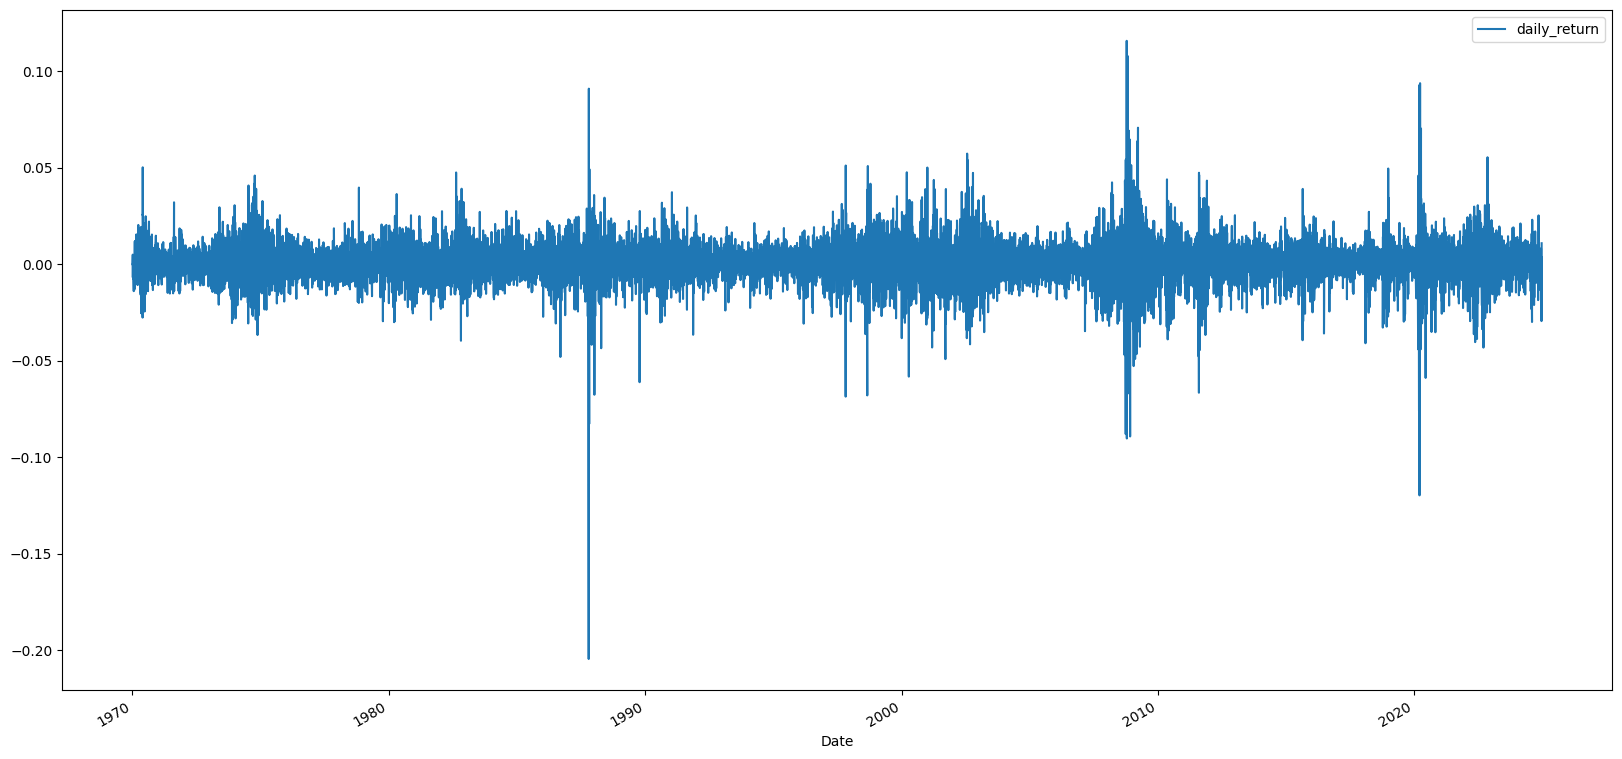

In [73]:
# Visualize the SP500 daily return
sp500_price.plot(x = "Date", y = "daily_return", figsize = (20,10))

<Axes: xlabel='Date'>

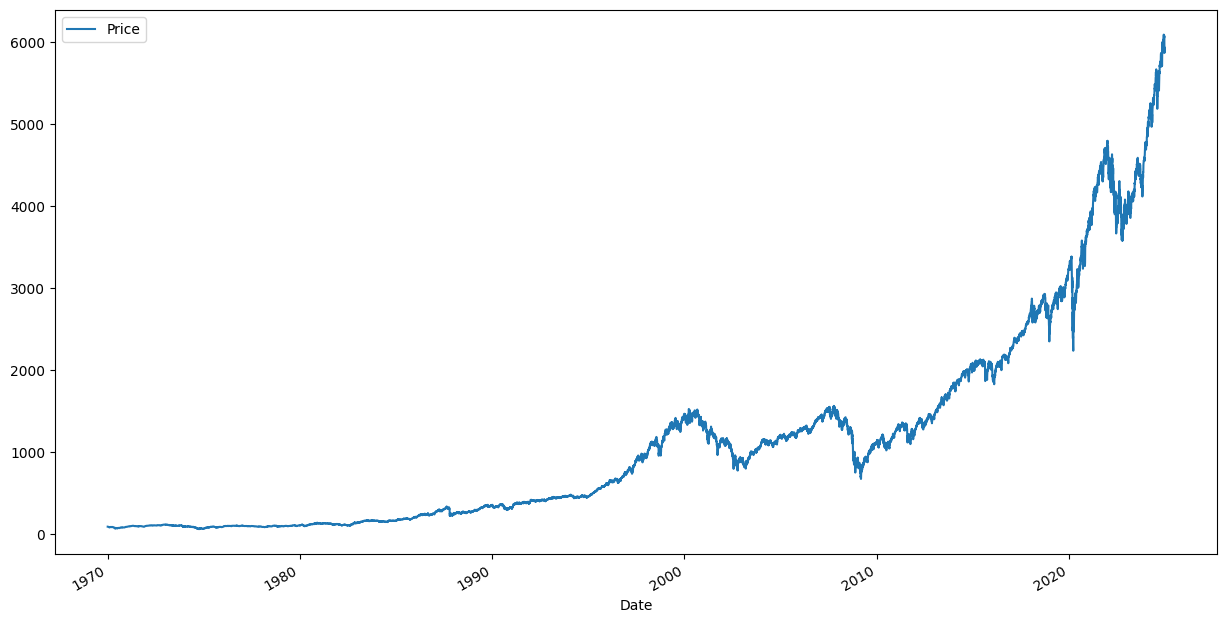

In [ ]:
# Visualize the SP500 adjusted close price over time
sp500_price.plot(y = "Price", x = "Date", figsize=(15, 8)) 

In [ ]:
# Statistiche riassuntive rendiemtti giornalieri SP500
sp500_price["daily_return"].describe()

max_daily_return = max(sp500_price["daily_return"])
min_daily_return = min(sp500_price["daily_return"])

# Crechiamo data max e min => max 0.115800 / min -0.204669
sp500_price.loc[sp500_price["daily_return"] == max_daily_return] # 13 october 2008

sp500_price.loc[sp500_price["daily_return"] == min_daily_return]

,Date,Price,daily_return
4497,1987-10-19,224.839996,-0.204669


In [117]:
# Is there period of x daily return that are consistently positve or negative?
serie_of_day = 6

data_partenza_serie = []

for i in range(len(dayly_return)):
    if i <= len(dayly_return) - (serie_of_day):
        lista_giorni = dayly_return[i:(i + serie_of_day)]

        serie_conforme = True
        f = 0

        while serie_conforme and f < len(lista_giorni):
            for e, k in enumerate(lista_giorni):
                if e > 0:
                    if k < lista_giorni[e-1]:
                        serie_conforme = False
            f = f + 1            

        if serie_conforme:
            data_partenza_serie.append(sp500_price["Date"][i])                        

data_partenza_serie      

[Timestamp('1972-06-28 00:00:00'),
 Timestamp('1973-04-02 00:00:00'),
 Timestamp('1974-07-31 00:00:00'),
 Timestamp('1977-04-04 00:00:00'),
 Timestamp('1977-07-11 00:00:00'),
 Timestamp('1978-05-23 00:00:00'),
 Timestamp('1983-07-27 00:00:00'),
 Timestamp('1984-10-08 00:00:00'),
 Timestamp('1995-04-17 00:00:00'),
 Timestamp('1997-01-23 00:00:00'),
 Timestamp('2005-01-19 00:00:00'),
 Timestamp('2011-05-23 00:00:00'),
 Timestamp('2023-07-06 00:00:00')]

In [101]:
x = [10, 25, 30, 40, 60, 3, 6, 19, 15, 10]

serie_of_day = 3

data_partenza_serie = []

for i in range(len(x)):
    if i <= len(x) - (serie_of_day):
        lista_giorni = x[i:(i + serie_of_day)] 

        serie_conforme = True
        f = 0

        while serie_conforme and f < len(lista_giorni):
            for e, k in enumerate(lista_giorni):
                if e > 0:
                    if k < lista_giorni[e-1]:
                        serie_conforme = False
            f = f + 1            

        if serie_conforme:
            print(i)                   

0
1
2
5


In [ ]:
# Variable
year_investment = 10 #in term of year
days = int(year_investment * mean_year_days) #Intero dei numero di giorni di investimento
capitale = 1000

In [151]:
# Rendimento a 10 anni
# Esempio: suppongo che investo il 1970-01-02 e fine investimento il  1979-12-21
sp500_price.loc[sp500_price.index == days] # Data fine investimento 1979-12-21

rendimeto_investimento = (sp500_price.loc[sp500_price.index == days]["Price"].values / sp500_price.loc[sp500_price.index == 0]["Price"].values) - 1

float(((1+rendimeto_investimento) * capitale))

1156.8816810525873

In [ ]:
# Calcolo del rendiemtno dell'investimeto a x anni?
rendimenti = []

for i in range(len(sp500_price["Date"])):
    if i >= days:
        rendimenti.append(float((sp500_price.loc[sp500_price.index == i]["Price"].values / sp500_price.loc[sp500_price.index == (i - days)]["Price"].values) - 1))

rendimenti_annualizzati = [((1 + i)**(1/year_investment)) -1 for i in rendimenti]

0.08184019830776507

In [176]:
mean = round(np.mean(rendimenti_annualizzati) * 100, 4) 
massimo = round(np.max(rendimenti_annualizzati)  * 100 , 4)
minimo = round(np.min(rendimenti_annualizzati)  * 100, 4)
mediana = round(np.median(rendimenti_annualizzati)  * 100, 4) 

summary = {"Mean": mean, "Min": minimo, "Max": massimo, "Median": mediana}

summary

{'Mean': 8.184, 'Min': -5.7829, 'Max': 17.1651, 'Median': 9.1996}

In [182]:
# Significat time horizon
significant_time_horizont = [1, 3, 5, 10, 20]

summary_per_significant_year = {}
dati_rendiementi = {}

for anno in significant_time_horizont:
    rendimenti_complessivi = []
    days = int(anno * mean_year_days)

    for i in range(len(sp500_price["Date"])):
        if i >= days:
            rendimenti_complessivi.append(float((sp500_price.loc[sp500_price.index == i]["Price"].values / sp500_price.loc[sp500_price.index == (i - days)]["Price"].values) - 1))

    rendimenti_annualizzati = [((1 + i)**(1/anno)) -1 for i in rendimenti_complessivi]
    dati_rendiementi[f"{anno}"] = rendimenti_annualizzati

    mean = round(np.mean(rendimenti_annualizzati) * 100, 4) 
    massimo = round(np.max(rendimenti_annualizzati)  * 100 , 4)
    minimo = round(np.min(rendimenti_annualizzati)  * 100, 4)
    mediana = round(np.median(rendimenti_annualizzati)  * 100, 4) 
    stdv = round(np.std(rendimenti_annualizzati)  * 100, 4) 

    summary = {"Mean": mean, "Min": minimo, "Max": massimo, "Median": mediana, "Dev std": stdv}
    
    summary_per_significant_year[f"{anno}"] = summary

In [183]:
summary_per_significant_year

{'1': {'Mean': 9.3461,
  'Min': -48.8228,
  'Max': 74.7797,
  'Median': 10.8577,
  'Dev std': 16.298},
 '3': {'Mean': 8.0898,
  'Min': -19.0608,
  'Max': 30.9068,
  'Median': 9.2737,
  'Dev std': 9.0492},
 '5': {'Mean': 8.0829,
  'Min': -10.1742,
  'Max': 26.1541,
  'Median': 9.1839,
  'Dev std': 7.0546},
 '10': {'Mean': 8.184,
  'Min': -5.7829,
  'Max': 17.1651,
  'Median': 9.1996,
  'Dev std': 4.575},
 '20': {'Mean': 8.1466,
  'Min': 2.4952,
  'Max': 14.5026,
  'Median': 7.6312,
  'Dev std': 2.5129}}

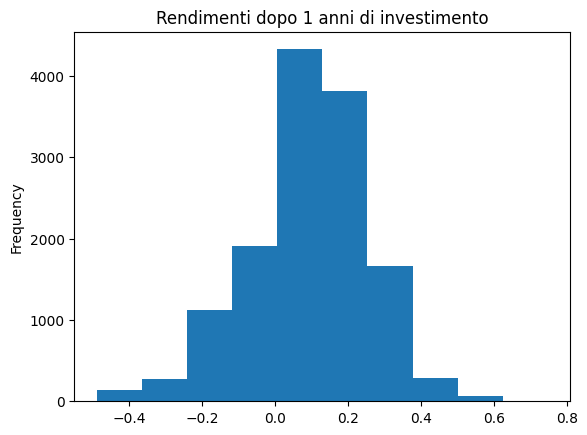

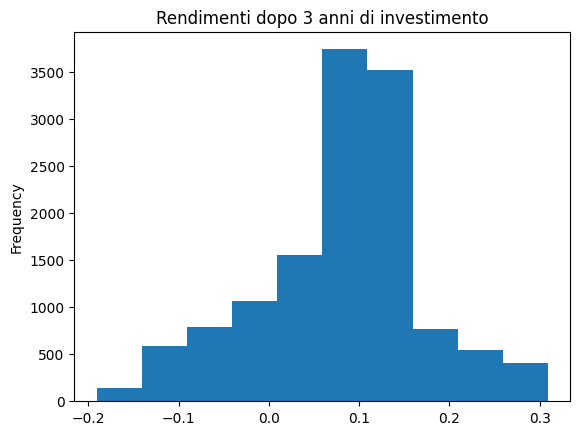

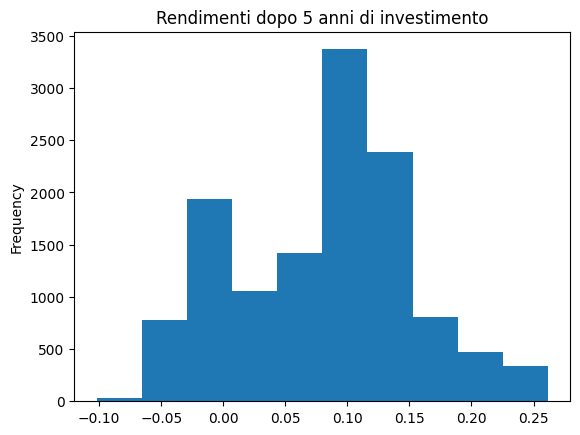

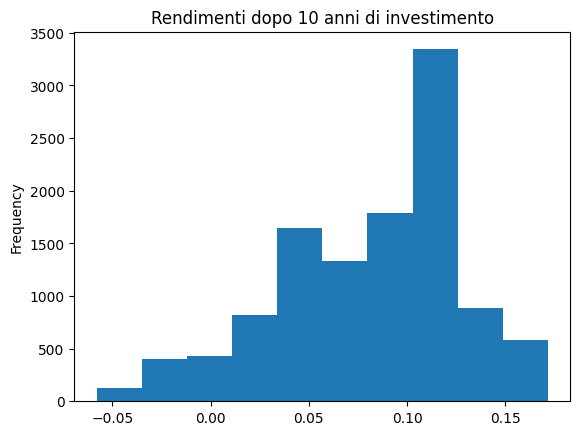

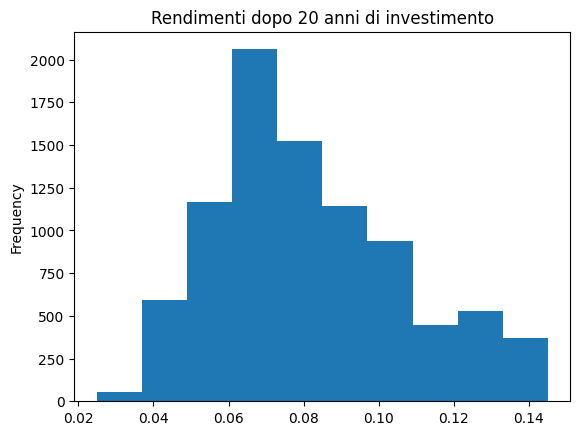

In [ ]:
for i in dati_rendiementi:
    pd.DataFrame(dati_rendiementi[i]).plot(kind='hist', title = f"Rendimenti dopo {i} anni di investimento", legend=False)

In [219]:
# Case 10 year investment
dati_10 = pd.DataFrame(dati_rendiementi["10"])
dati_10.columns = ["return"]

num_dati = len(dati_10["return"])

# rendimenti < 0, negativi
return_negative = (sum([1 if i <=0 else 0  for i in dati_10["return"]])/num_dati) * 100

return_negative # 5,59%

# rendimenti sopra media a 10 anni
return_over_mean = (sum([1 if i >= summary_per_significant_year["10"]["Mean"]/100 else 0 for i in dati_10["return"]])/num_dati) * 100

return_over_mean # 56.994%

56.99427060379022

In [227]:
# Tasso target
tasso_target = [0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2]

for tasso in tasso_target:
    return_over_target = (sum([1 if i >= tasso else 0 for i in dati_10["return"]])/num_dati) * 100
    print(f"La probabilità di ottenere rendimenti annuali maggiori del tasso target del {round(tasso*100, 0)}% è pari al {round(return_over_target,2)}%")

La probabilità di ottenere rendimenti annuali maggiori del tasso target del 0% è pari al 94.4%
La probabilità di ottenere rendimenti annuali maggiori del tasso target del 1.0% è pari al 91.99%
La probabilità di ottenere rendimenti annuali maggiori del tasso target del 2.0% è pari al 88.91%
La probabilità di ottenere rendimenti annuali maggiori del tasso target del 3.0% è pari al 85.04%
La probabilità di ottenere rendimenti annuali maggiori del tasso target del 4.0% è pari al 83.55%
La probabilità di ottenere rendimenti annuali maggiori del tasso target del 5.0% è pari al 76.27%
La probabilità di ottenere rendimenti annuali maggiori del tasso target del 6.0% è pari al 67.45%
La probabilità di ottenere rendimenti annuali maggiori del tasso target del 7.0% è pari al 63.0%
La probabilità di ottenere rendimenti annuali maggiori del tasso target del 8.0% è pari al 58.09%
La probabilità di ottenere rendimenti annuali maggiori del tasso target del 9.0% è pari al 51.41%
La probabilità di ottene